In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras_vggface.vggface import VGGFace
from keras.utils.data_utils import get_file
from keras_vggface.utils import preprocess_input
from Helper import decode_predictions

V2_LABELS_PATH = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_labels_v2.npy'
VGGFACE_DIR = 'models/vggface'

In [5]:
# Testing Target
fpath = get_file('rcmalli_vggface_labels_v2.npy', V2_LABELS_PATH, cache_subdir=VGGFACE_DIR)
LABELS = np.load(fpath)
## Format of ' FIRSTNAME_LASTNAME'
Target_ID = np.where(LABELS == ' Channing_Tatum')

# Load Generator Model and vggface
test_model = tf.keras.models.load_model("Saved_Models/" + LABELS[Target_ID[0][0]] + "_Model/generator-" + str(Target_ID[0][0]))
test_model.summary()
model = VGGFace(model='resnet50')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 201488)            20148800  
_________________________________________________________________
batch_normalization (BatchNo (None, 201488)            805952    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 201488)            0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 4112)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 2056)      33817088  
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 2056)      8224      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 2056)      0

id:1418 b' Channing_Tatum': 99.256%
id:2230 b' Eduardo_Vargas': 0.058%
id:8302 b' Vittorio_Grigolo': 0.048%
id:1344 b' Carolyn_Murphy': 0.040%
id:376 b' Amber_Heard': 0.039%


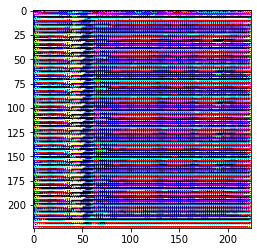

In [3]:
# Test loaded model
generated_image = test_model(tf.random.normal([1,100]), training=True)
plt.imshow(generated_image[0])

# Save Tested Image
plt.imsave("Images/" + LABELS[Target_ID[0][0]] + ".png" , generated_image.numpy()[0])

generated_image = generated_image * 255

generated_image = preprocess_input(generated_image, version = 2)
    
yhat = model(generated_image)

results = decode_predictions(yhat)

# display most likely results
for result in results[0]:
    print('id:%i %s: %.3f%%' % (result[2], result[0], result[1]*100))

id:8365 b' Whoopi_Goldberg': 99.394%
id:5830 b' Myriam_Soumar\xc3\xa9': 0.157%
id:177 b' Alassane_Ouattara': 0.097%
id:935 b' Bernie_Mac': 0.064%
id:957 b' Bette_Midler': 0.064%


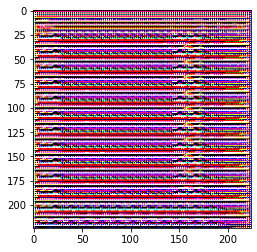

In [10]:
# Load Tested image

image = plt.imread('Images/' + LABELS[Target_ID[0][0]] + ".png")
#image = plt.imread("Images/Whoopi_Goldberg.png")

plt.imshow(image)

image = image[...,0:3] * 255
image = np.expand_dims(image, axis=0)

image = preprocess_input(image, version = 2)
    
yhat = model(image)

results = decode_predictions(yhat)

# display most likely results
for result in results[0]:
    print('id:%i %s: %.3f%%' % (result[2], result[0], result[1]*100))